In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
import scipy as sp
from scipy.optimize import fsolve

####  1) Обрати одну з компаній
##### Моїм вибором стала компанія Tesla

In [2]:
teslaFrame = pd.read_csv('TSLA.csv')

In [3]:
teslaFrame.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-02-14,23.639999,25.49,22.559999,23.180000,23.180000,11341000
1,2011-02-21,22.879999,23.85,21.110001,23.610001,23.610001,6071800
2,2011-02-28,23.740000,24.99,23.500000,24.950001,24.950001,5041200
3,2011-03-07,24.930000,25.40,23.530001,24.070000,24.070000,6306100
4,2011-03-14,23.820000,24.00,21.799999,22.959999,22.959999,5265000


###### Дані мають бути за 10 років, але Тесла на є на ринку ще 10 років, тому було відібрано дані від 14 лютого 2011 до 12 лютого 2018

In [4]:
print("Max date: "+np.max(teslaFrame.Date))
print("Min date: "+np.min(teslaFrame.Date))

Max date: 2018-02-12
Min date: 2011-02-14


###### В якості параметра для 𝑟 𝑚 𝑝 візьмем дані S&P 500 (^GSPC) про щомісячний прибуток за той самий період

In [5]:
sp500 = pd.read_csv('GSPC.csv')

In [6]:
#Переконалися, що дані S&P за той самий період
print("Max date: "+np.max(sp500.Date))
print("Min date: "+np.min(sp500.Date))

Max date: 2018-02-12
Min date: 2011-02-14


#### Використовуючи комп'ютерне програмне забезпечення для виконання регресійних розрахунків оцініть за допомогою звичайного методу найменших квадратів параметри альфа і бета для довільних двох компаній, що представляють дві обрані галузі. Чи відповідають оцінки бета вашим інтуїтивним уявленням? Чому так або чому ні?
###### 𝑥=𝑟_m , 𝑦=𝑟_p, 𝑦𝑖 = 𝛼 + 𝛽𝑥𝑖 + 𝜀𝑖

In [7]:
x = (sp500.High+sp500.Low)/2.0
y = (teslaFrame.High+teslaFrame.Low)/2.0

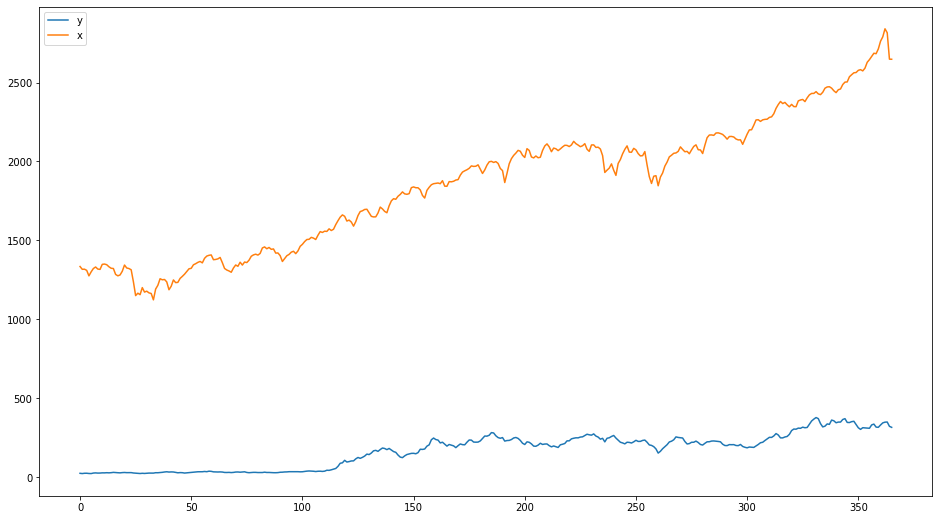

In [8]:
#Відобразимо x та y на графіку
plt.figure(figsize=(16, 9))
plt.plot(y, label='y')
plt.plot(x, label='x')
plt.legend()

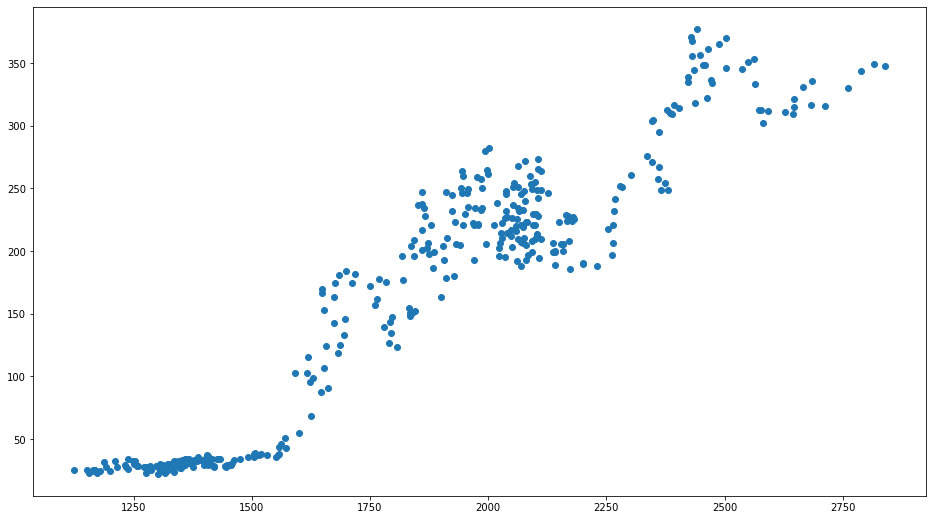

In [9]:
#Вивели x та y, та можна уявно провести лінію
plt.figure(figsize=(16, 9))
plt.scatter(x,y)

In [10]:
#Уявно провели лінію, а тепер треба підібрати графік для цієї прямої, котра описує рух наших x та y

In [11]:
A = np.vstack([x, np.ones(len(x))]).T
print(np.shape(A))

(366, 2)


In [12]:
#Шукаємо альфа та бета
# Функція linalg.lstsq() вирішує задачу пошуку найменьших квадратів для лінійного матричного рівняння.
alpha, beta = np.linalg.lstsq(A, y)[0]
print("Alpha: {}, Beta: {}".format(alpha,beta))

Alpha: 0.24665078816205027, Beta: -290.00980916861164


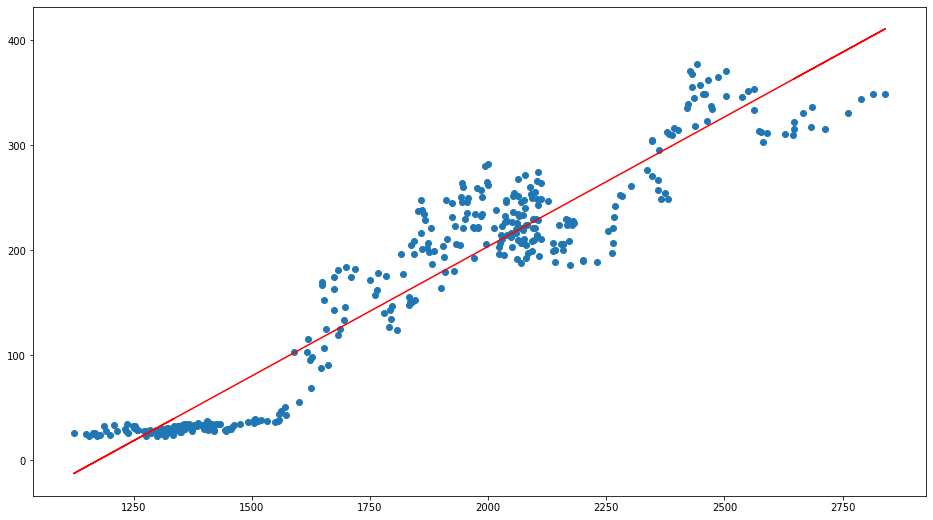

In [13]:
#Тепер, коли ми маємо коефіцієнти, то можемо побудувати цю пряму, 
#та накласти її на х та у - побачити, чи правильно ми підібрали коефіцієнти
plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.plot(x, alpha*x + beta, 'r')
plt.show()
#Важко сказати, 
#чи відповідають альфа та бета моїм уявленням - досить велика кількість даних+ бета = від'ємне велике число
#альфа так, відповідає, а от бета - ні

#### Для кожної з компаній перевірте нульову гіпотезу про те, що альфа = 0 (у порівнянні з альтернативною гіпотезою про те, що альфа != 0), використовуючи рівень значимості 5%. Чи означає відкидання цієї нульової гіпотези, що модель ЦОК є невірною? Чому так або чому ні? Визначте довірчий інтервал (з рівнем довіри 95%) для альфа.

#### Для вашої компаній обчисліть r та R2? Чи відповідають оцінки цих коефіцієнти вашим інтуїтивним уявленням? Чому так або чому ні?

In [14]:
r = (np.cov(x,y)/(np.sqrt(np.var(x)*np.var(y))))[0][1]

In [15]:
print(r)
#Бачимо, що коефіцієнт Пірсона досить високий, а це значить, що лінійна задежность між x та y досить висока

0.9550658372608375


In [16]:
# Для себе
#SST = SSE+SSR = sum (y_i - y_mean)**2
#SSR = sum (y_pred_i - y_mean)**2
#SSE = sum (y_i - y_pred_i)**2

In [17]:
def SSE(y,y_pred):
    sse = 0
    for k in range(len(y)):
        sse+=((y[k]-y_pred[k])**2)
    return sse

In [18]:
def SSR(y_pred,y_mean):
    ssr = 0
    for k in range(len(y_pred)):
        ssr+=((y_pred[k]-y_mean)**2)
    return ssr

In [19]:
def SST(ssr,sse):
    return ssr+sse

In [20]:
y_mean = np.mean(y)
y_pred = []
for k in x:
    y_pred.append(alpha*k+beta)

In [21]:
#R**2 = SSR/SST
ssr = SSR(y_pred,y_mean)
sse = SSE(y,y_pred)
R_sq = ssr/SST(ssr,sse)
print("R**2: {}".format(R_sq))
#Коефіцієнт детермінації має значення близьке до 1, тому можна сказати, що залежність сильна

R**2: 0.9071731324868108


#### Перевірити модель на адекватність (F-статистики);

In [22]:
m = 1
n = len(y)
#F = (sum(y_pred_i - y_pred_mean)**2)/m*((n-m-1)/sum(y_i-y_pred_i)**2)

In [23]:
F_ch = 0
y_pred_mean = np.mean(y_pred)
for k in y_pred:
    F_ch+=(k-y_pred_mean)**2
F_zn = 0
for k in range(len(y)):
    F_zn+=(y[k]-y_pred[k])**2
F = (F_ch/m)*((n-m-1)/F_zn)
print(F)

3557.278502134968


In [24]:
#Перевіримо значення за таблицею Фішера
k1 = 1
k2 = n-m-1
print(k2)
# Звичайно ми беремо наближене значення в таблиці - немає в таблиці значення для k2 = 364, тому F_t = 63.06
# Оскільки наше F > F_t - то виходить, що цією моделлю можна користуватися

364


#### Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);

In [25]:
t_crit = stats.t.ppf(q=1-0.025,df=len(y))

In [26]:
def sp_y_pred(x,y,y_pred):
    mean, var = np.mean(x), np.var(x)
    n = len(y)
    e = y-y_pred
    su_2 = n*np.var(e)/(n-2)
    a = su_2/n
    b = (1+(x-mean)**2)/var
    return np.sqrt(a*b)

In [27]:
def calcualte_interval(val,sp_val,t_crit): 
    return (val-sp_val*t_crit,val+sp_val*t_crit)

In [28]:
l,r = calcualte_interval(y_pred,sp_y_pred(x,y,y_pred),t_crit)

In [29]:
interval = pd.DataFrame(np.array([l,y_pred,r,]).T,columns=['low','pred','high'])
interval

,low,pred,high
0,34.861773,39.106195,43.350617
1,30.338115,34.726924,39.115733
2,30.553399,34.935337,39.317274
3,28.618330,33.062031,37.505733
4,19.773531,24.499543,29.225555
...,...,...,...
361,390.429683,398.018861,405.608040
362,402.596545,410.600550,418.604555
363,396.585860,404.384932,412.184004
364,356.692409,363.131323,369.570238


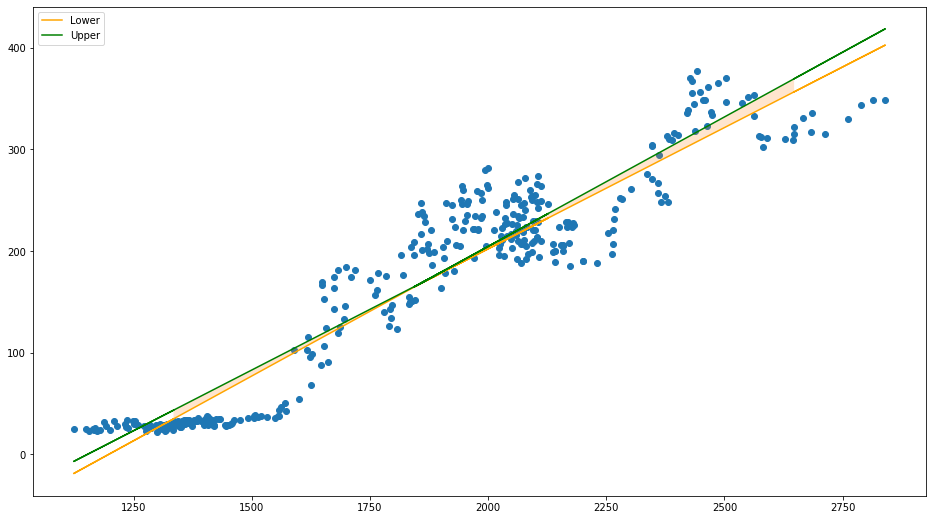

In [30]:
plt.figure(figsize=(16,9))

plt.scatter(x,y)
plt.plot(x, interval['low'],color='orange',label='Lower')
plt.plot(x,interval['high'],c='green',label='Upper')
plt.fill_between(x,interval['low'],interval['high'],alpha=0.2)
plt.legend();

#### Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього місяця, та побудуйте довірчий інтервал.